## Data Exploration with the Hillenbrand database

The main purpose of this demo notebook is:
- get acquainted with the Hillenbrand database
- basic usage of pandas : a popular python package for database handling
- basic usage of seaborn: popular python packages for database visualizations
- basic histogram and scatter plots for 1D or multiD data

In [2]:
# Importing some core Python libraries for data handling and plotting's baseline machine learning stack 
#
%matplotlib inline
import sys,os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

try:
  import pyspch
except:
  ! pip install git+https://github.com/compi1234/pyspch.git
from pyspch.io.hillenbrand import fetch_hillenbrand, select_hillenbrand

In [26]:
# installing a colorpalette and markers that can handle the 12 class data 
colors12 = ['blue','green','red','magenta','maroon', 'darkorange','steelblue', 'darkviolet', 'gold','limegreen',   'darkkhaki', 'cyan','skyblue', 
        ]
markers = ('o', 'P','v', '^', '<', '>', 'X','8', 's', '*', 'h', 'H', 'D', 'd', 'P','p')
#
cp = sns.color_palette(colors12)
sns.set_palette(cp)
#sns.palplot(cp)
# 
np.set_printoptions(precision=2)

## 1. The Hillenbrand Database 
All demonstrations in this notebook are using (parts of) the Hillenbrand '95 database. For detailed information and references: http://homes.esat.kuleuven.be/~spchlab/datasets/hillenbrand/README.txt

The function *fetch_hillenbrand()* fetches the Hillenbrand database or part of it. By default it returns the most used columns.
Possible subselection criteria for rows are genders="..." and vowels="...". Columns are selected with the columns arguments. 

To get more details on this routine, type help(fetch_hillenbrand)

The fetch_hillenbrand() returns a pandas dataframe.   This is a basic 2dimensional datastructure.  The rows are data records; these may be labeled by an index; in the example below the index is the file-id.  The columns are labeled data fields.  As called, the routine returns gender, vowel, f0, F1, F2 and F3.  The first 2 are label (class) properties.  The latter 4 are numeric values.
We drop all records with missing data values in the requested fields.

In [14]:
hildata = fetch_hillenbrand(genders='adults').dropna()
all_vowels = np.unique(hildata['vowel'])
all_genders = np.unique(hildata['gender'])
all_features = ["f0","F1","F2","F3"]
print(all_vowels)
print(all_genders)
print(all_features)
# it's convenient to keep the same vowel order between plots and to map this to a fixed color
vowel_order = ['iy','ah','uw','ih','eh','er','uh','ae','aw','oo','ei','oa']
col_dict = dict(zip(vowel_order,cp.as_hex()))
#
hildata

['ae' 'ah' 'aw' 'eh' 'ei' 'er' 'ih' 'iy' 'oa' 'oo' 'uh' 'uw']
['m' 'w']
['f0', 'F1', 'F2', 'F3']


,gender,vowel,f0,F1,F2,F3
fid,,,,,,
m01ae,m,ae,174.0,663.0,2012.0,2659.0
m02ae,m,ae,102.0,628.0,1871.0,2477.0
m03ae,m,ae,99.0,605.0,1812.0,2570.0
m04ae,m,ae,124.0,627.0,1910.0,2488.0
m06ae,m,ae,115.0,647.0,1864.0,2561.0
...,...,...,...,...,...,...
w46uw,w,uw,166.0,362.0,1351.0,2879.0
w47uw,w,uw,238.0,482.0,987.0,2781.0
w48uw,w,uw,234.0,458.0,1163.0,2651.0


## Selecting data from a pandas dataframe
The two most basic selection mechanisms on pandas dataframe 'df' are:
- selection of columns
    + e.g. **df.col[ ['F1','F2'] ]** for selecting F1 and F2 data only
- selection of rows that satisfy certain criteria with hildata.loc[] 
    + e.g. **df.loc[ df['vowel'].isin(['iy','ih']) ]** for selecting the rows that contain iy and ih vowel-data
- combination of both (row selection first) in the .loc[] mechanism
    + e.g. **df.loc[ df['gender']=='m','f0']** will only select male-data and return the f0 feature only

## 2. Histograms for 1D data  - Example: Pitch

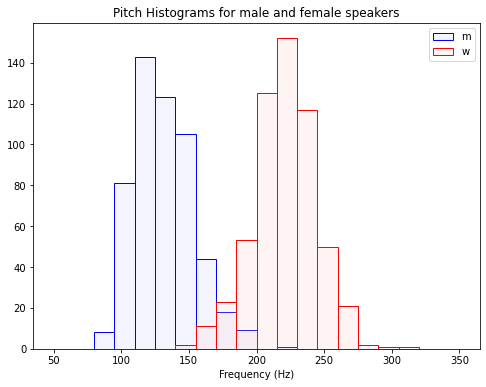

In [15]:
# plot histograms of the data
Xmale = hildata.loc[hildata['gender']=='m','f0']
Xfemale = hildata.loc[hildata['gender']=='w','f0']
#fig,ax = plt.subplots(1,2,figsize=(10,10))
plt.figure(figsize=(8,6))
plt.hist(Xmale,range=[50.,350.],bins=20,ec='b',fc=(.8,.8,1,.2))
plt.hist(Xfemale,range=[50.,350.],bins=20,ec='r',fc=(1,.8,.8,.2))
plt.xlabel('Frequency (Hz)')
plt.legend(['m','w'])
plt.title('Pitch Histograms for male and female speakers');

## Scatter Plots of 2D data (F1-F2 vowel data)

The scatter plots below are shown for 3, 6, respectively 10 classes (the vowel classes used by Peterson & Barney, 1952).
While the 3 classes are perfectly separable in the F1-F2 space, this is only partially true for the 6 classes and not at all for the 10 class data.

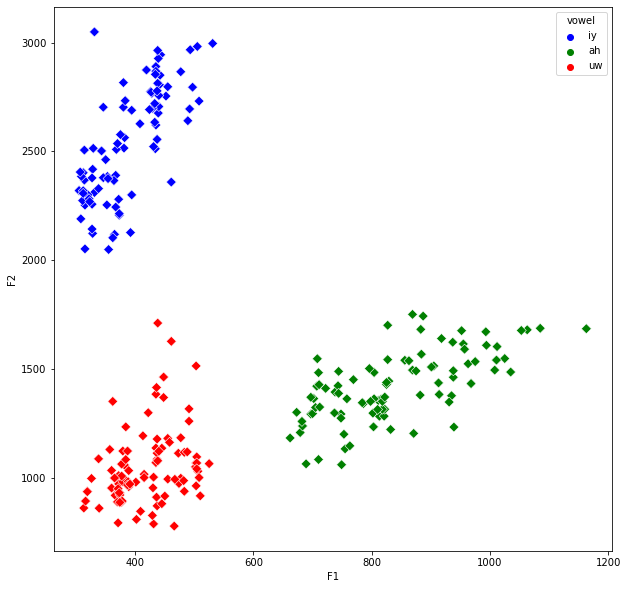

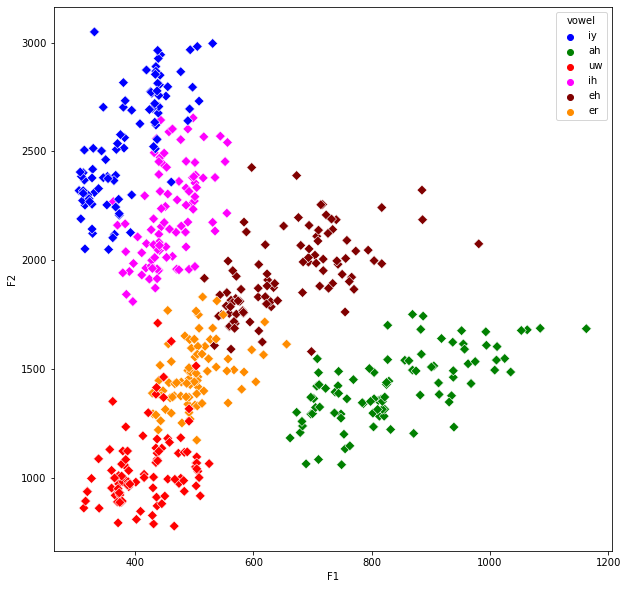

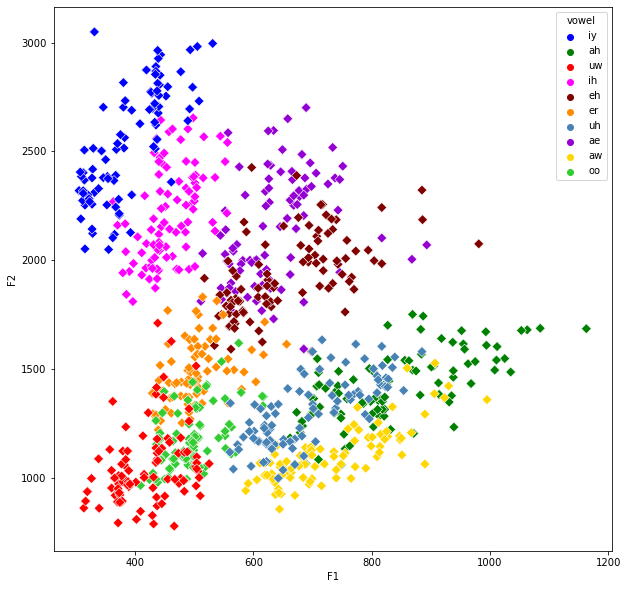

In [22]:
# select the vowels you want to plot
for nv in (3,6,10):
    f,ax = plt.subplots(figsize=(10,10))
    df = select_hillenbrand(hildata,vowels=vowel_order[:nv])
    sns.scatterplot(x='F1',y='F2',data=df,hue="vowel",marker='D',s=50,palette=col_dict,hue_order=vowel_order[:nv]);


The above scatter plots can also be shown in a variant where the datapoints are marked with their own label

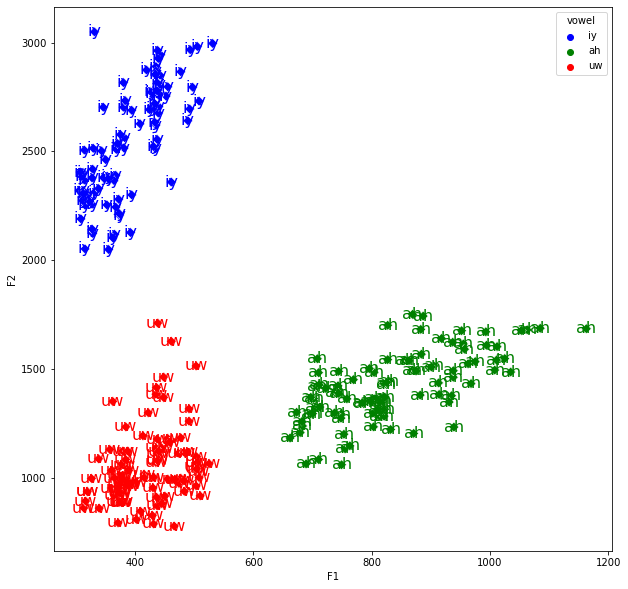

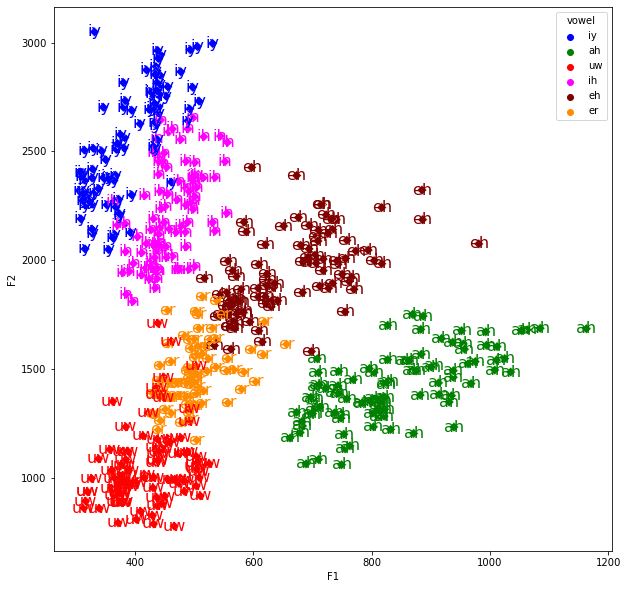

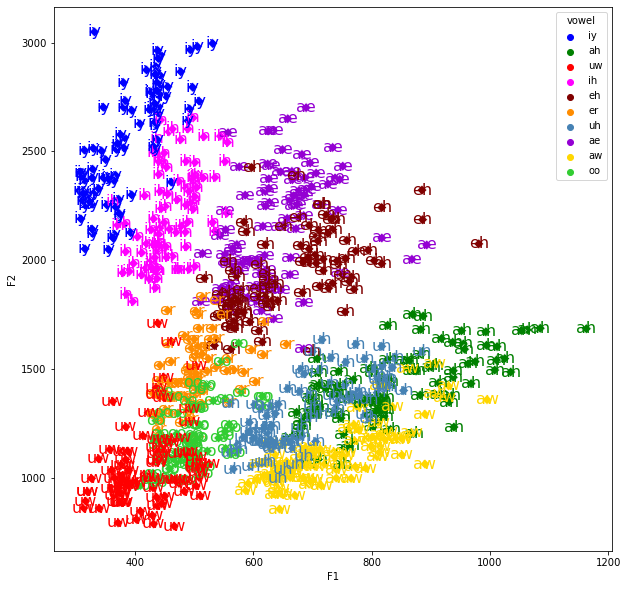

In [35]:
ftr = ['F1','F2']
for nv in (3,6,10):
    f,ax = plt.subplots(figsize=(10,10))
    df = select_hillenbrand(hildata,vowels=vowel_order[:nv])
    sns.scatterplot(x=ftr[0],y=ftr[1],data=df,hue="vowel",marker='D',s=50,palette=col_dict,hue_order=vowel_order[:nv]);
    for i,entry in df.iterrows():
        vow = entry['vowel']
        plt.text(entry[ftr[0]],entry[ftr[1]],vow,ha='center',va='center',fontsize=16,color=col_dict[vow] )

## Grid plots for multi-dimensional data

<Figure size 720x720 with 0 Axes>

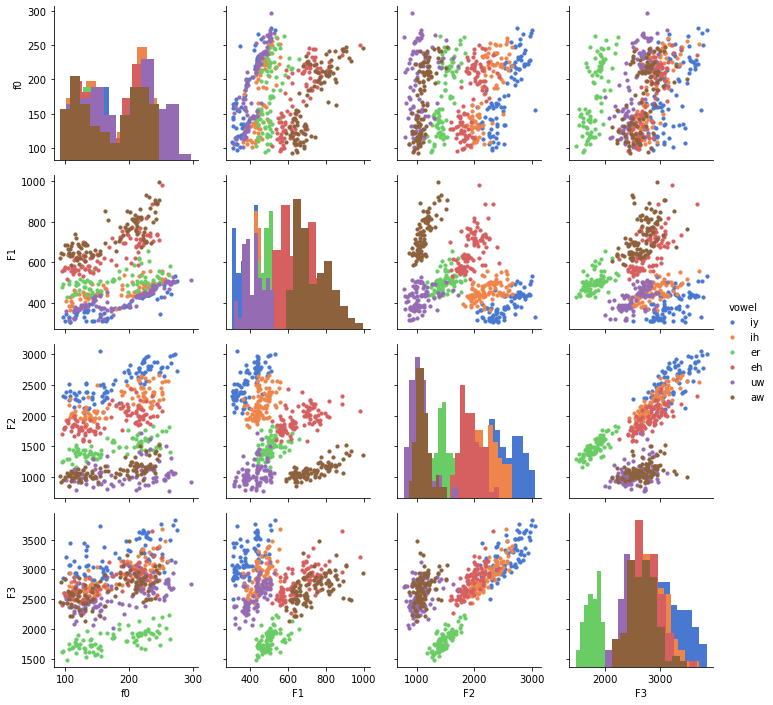

In [37]:
sns.set_palette('muted')
# select data and set classes / side_kick
data = hildata.loc[hildata['gender'].isin(genders) & hildata['vowel'].isin(vowels)]
genders = ['m','w']
features = ['f0','F1','F2','F3']
target = 'vowel'
classes = vowels
side_classes = genders

##########################
# 1. make a grid plot using all features and the target as hue 
f=plt.figure(figsize=(10,10))
g = sns.PairGrid(data.loc[:,[target]+features],hue=target,hue_order=classes)
g.map_diag(plt.hist, linewidth=2)
g.map_offdiag(plt.scatter,s=10)
g.add_legend()
#
#f=plt.figure(figsize=(10,10))
#g = sns.PairGrid(data.loc[:,[side_target]+features],hue=side_target,hue_order=side_classes)
#g.map_diag(sns.kdeplot, linewidth=2)
#g.map_offdiag(plt.scatter,s=10)
#g.add_legend()
# 2. make scatter plots with of two main features and either target or side_kick as focus
#f=plt.figure(figsize=(8,8))
#sns.scatterplot(x=features[0],y=features[1],data=data,hue=target,hue_order=classes,style=side_target,markers=markers[0:len(side_classes)],s=75)
#f=plt.figure(figsize=(8,8))
#sns.scatterplot(x=features[0],y=features[1],data=data,hue=side_target,style=target,markers=markers[0:len(classes)],style_order=classes,s=75)